In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [313]:
SEED = 42
pd.set_option('display.float_format', '{:.2f}'.format)

In [314]:
from datasets import load_dataset

df = load_dataset("nateraw/avocado-prices")["train"].to_pandas()
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


На всякий, описание датасета:

| Колонка | Описание |
|---------|-----------|
| Unnamed | Нумерация с 0 для каждого региона |
| Date | Дата наблюдения |
| AveragePrice | Средняя цена одного авокадо |
| Total Volume | Общее количество проданных авокадо |
| 4046 | Общее количество проданных авокадо с кодом PLU 4046 |
| 4225 | Общее количество проданных авокадо с кодом PLU 4225 |
| 4770 | Общее количество проданных авокадо с кодом PLU 4770 |
| Total Bags | Общее количество проданных пакетов |
| Small Bags | Общее количество проданных маленьких пакетов |
| Large Bags | Общее количество проданных больших пакетов |
| XLarge Bags | Общее количество проданных очень больших пакетов |
| type | Обычный (conventional) или органический (organic) |
| year | Год |
| Region | Город или регион наблюдения |


In [315]:
del df['Unnamed: 0'] #это нам не надо

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [317]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

null`ов нет здорово <br>
значит совсем чуть-чуть предобработочки

In [318]:
df_processed  = df.copy()

le = LabelEncoder()
df_processed['region'] = le.fit_transform(df_processed['region'])


df_processed = df_processed.rename(columns={'type': 'organic'})
df_processed['organic'] = df_processed['organic'].map(lambda x: True if x == 'organic' else False)


df_processed['Date'] = pd.to_datetime(df_processed['Date'])
df_processed['month'] = df_processed['Date'].dt.month
del df_processed['Date']

df_processed

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,organic,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,False,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,False,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,False,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,False,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,False,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,True,2018,53,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,True,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,True,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,True,2018,53,1


дату и на синус/косинус конечно можно было кинуть. но пускай будет так

### Ищем выбросы

In [319]:
df_processed.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15,26.50,6.18
std,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94,15.58,3.53
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00,0.00,1.00
25%,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00,13.00,3.00
50%,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00,26.00,6.00
75%,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00,40.00,9.00
max,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00,53.00,12.00


т.к. колонок несколько, бахнем функции

тут все как на практике

In [320]:
def detect_outliers_zscore(df, column):
    df['Z_Score'] = np.abs(stats.zscore(df[column]))
    outliers_z = df[df['Z_Score'] > Z_THRESHOLD]

    print("\nВыбросы по Z:")
    print(outliers_z[[column, 'Z_Score']])

    return len(outliers_z)


def detect_and_fix_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Q1 (25-й перцентиль): {Q1}")
    print(f"Q3 (75-й перцентиль): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Нижняя граница: {lower_bound}")
    print(f"Верхняя граница: {upper_bound}")


    outliers_iqr = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    

    return df, len(outliers_iqr)

In [321]:
Z_THRESHOLD = 3

numerical_features = [
    'AveragePrice', 'Total Volume', '4046', '4225', '4770',
    'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'
]

df_clean = df_processed.copy()

print("\n=== ОБРАБОТКА ВЫБРОСОВ ===")
outliers_stats = []

for feature in numerical_features:
    print(f"\n\n\n----- {feature} -----")

    df_clean, outliers_iqr= detect_and_fix_outliers_iqr(df_clean, feature)
    
    # Метод Z-Score
    outliers_z = detect_outliers_zscore(df_processed, feature)
    
    print(f"Выбросов по IQR: {outliers_iqr}")
    print(f"Выбросов по Z-Score: {outliers_z}")
    
    outliers_stats.append({
        'Feature': feature,
        'IQR_Outliers': outliers_iqr,
        'Z_Score_Outliers': outliers_z
    })


=== ОБРАБОТКА ВЫБРОСОВ ===



----- AveragePrice -----
Q1 (25-й перцентиль): 1.1
Q3 (75-й перцентиль): 1.66
IQR: 0.5599999999999998
Нижняя граница: 0.26000000000000034
Верхняя граница: 2.4999999999999996

Выбросы по Z:
       AveragePrice  Z_Score
11320          2.79     3.44
11321          2.66     3.11
11323          2.74     3.31
11324          2.79     3.44
11325          2.73     3.29
...             ...      ...
17302          2.81     3.49
17303          2.84     3.56
17304          2.64     3.06
17402          2.70     3.21
17428          3.17     4.38

[131 rows x 2 columns]
Выбросов по IQR: 209
Выбросов по Z-Score: 131



----- Total Volume -----
Q1 (25-й перцентиль): 10838.58
Q3 (75-й перцентиль): 432962.29
IQR: 422123.70999999996
Нижняя граница: -622346.985
Верхняя граница: 1066147.855

Выбросы по Z:
      Total Volume  Z_Score
2652   27297983.67     7.66
2653   25083647.17     7.02
2654   28041335.38     7.87
2655   28800396.57     8.09
2656   22617999.38     6.30
...    

здесь посмотрим инфу по выбросам в более сжатом виде

In [322]:
outliers_df = pd.DataFrame(outliers_stats)
print("=== ТАБЛИЧКА СРАВНЕНИЯ ===\n")
print(outliers_df)

=== ТАБЛИЧКА СРАВНЕНИЯ ===

        Feature  IQR_Outliers  Z_Score_Outliers
0  AveragePrice           209               131
1  Total Volume          2297               171
2          4046          2518               181
3          4225          2519               180
4          4770          2918               259
5    Total Bags          2533               187
6    Small Bags          2407               179
7    Large Bags          2707               251
8   XLarge Bags          4014               234


In [323]:
with pd.option_context('display.width', 1000, 'display.max_columns', 20):
    print("=== ДО ОБРАБОТКИ ===")
    print(df_processed[numerical_features].describe())

    print("\n=== ПОСЛЕ ЗАМЕНЫ ВЫБРОСОВ ===")
    print(df_clean[numerical_features].describe())


=== ДО ОБРАБОТКИ ===
       AveragePrice  Total Volume        4046        4225       4770  Total Bags  Small Bags  Large Bags  XLarge Bags
count      18249.00      18249.00    18249.00    18249.00   18249.00    18249.00    18249.00    18249.00     18249.00
mean           1.41     850644.01   293008.42   295154.57   22839.74   239639.20   182194.69    54338.09      3106.43
std            0.40    3453545.36  1264989.08  1204120.40  107464.07   986242.40   746178.51   243965.96     17692.89
min            0.44         84.56        0.00        0.00       0.00        0.00        0.00        0.00         0.00
25%            1.10      10838.58      854.07     3008.78       0.00     5088.64     2849.42      127.47         0.00
50%            1.37     107376.76     8645.30    29061.02     184.99    39743.83    26362.82     2647.71         0.00
75%            1.66     432962.29   111020.20   150206.86    6243.42   110783.37    83337.67    22029.25       132.50
max            3.25   62505646.52 2

ну и конечно графики



----- AveragePrice -----


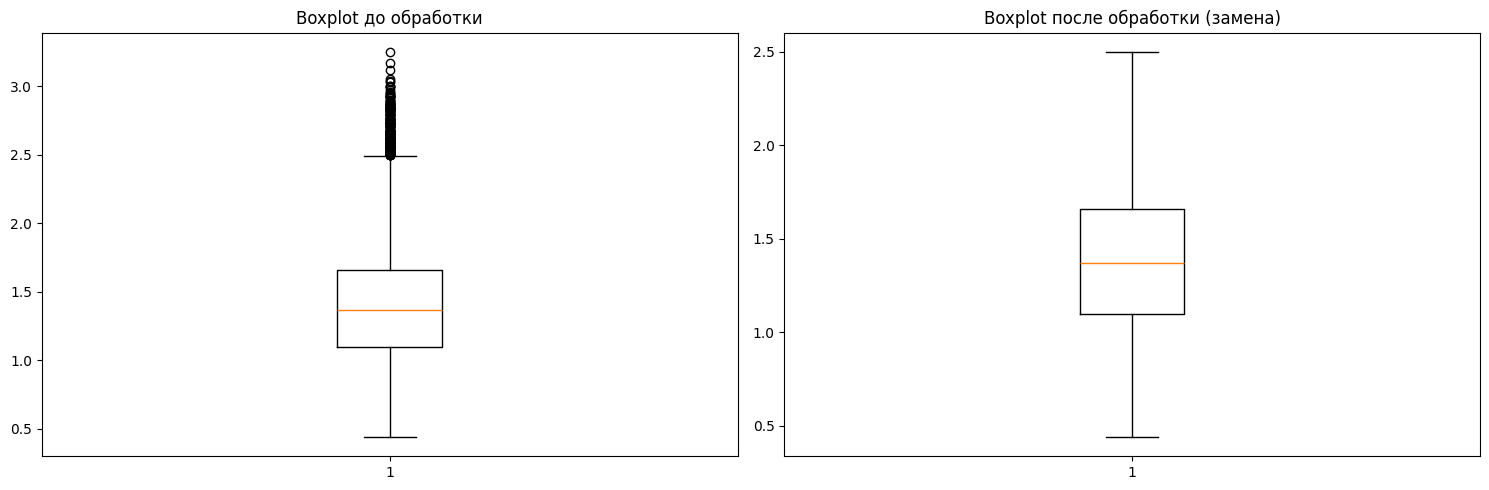



----- Total Volume -----


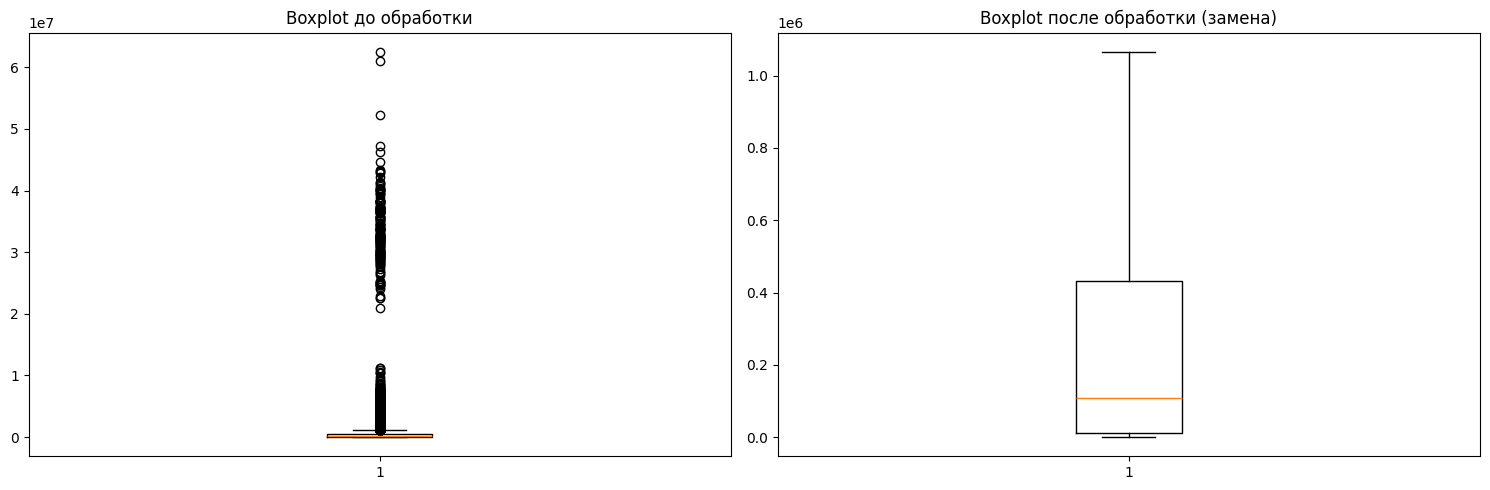



----- 4046 -----


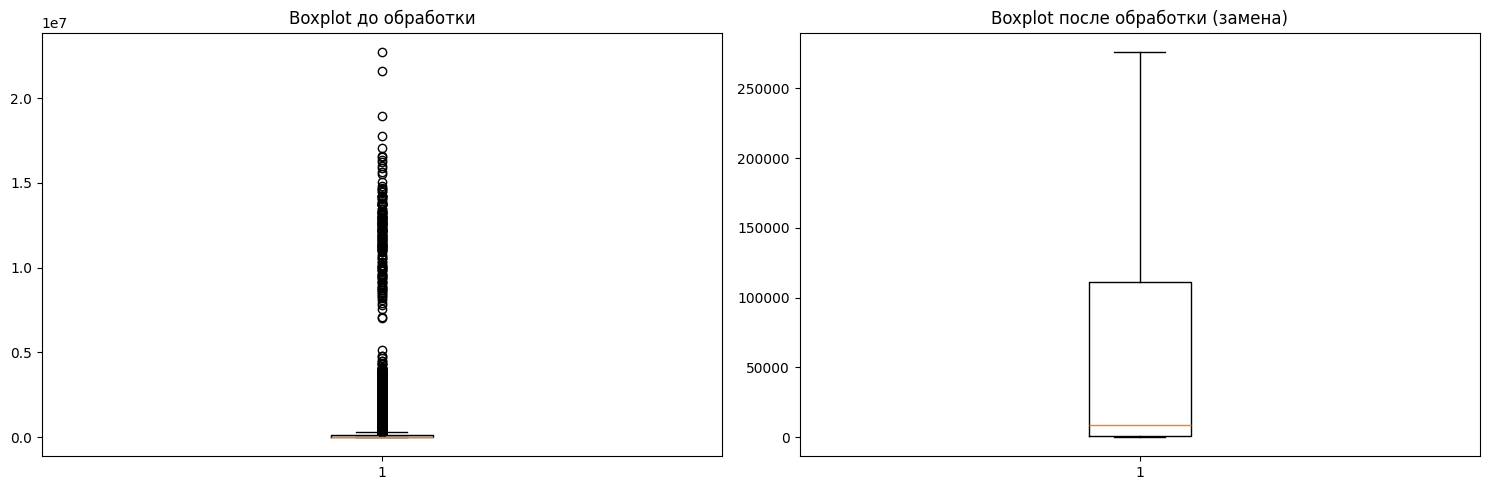



----- 4225 -----


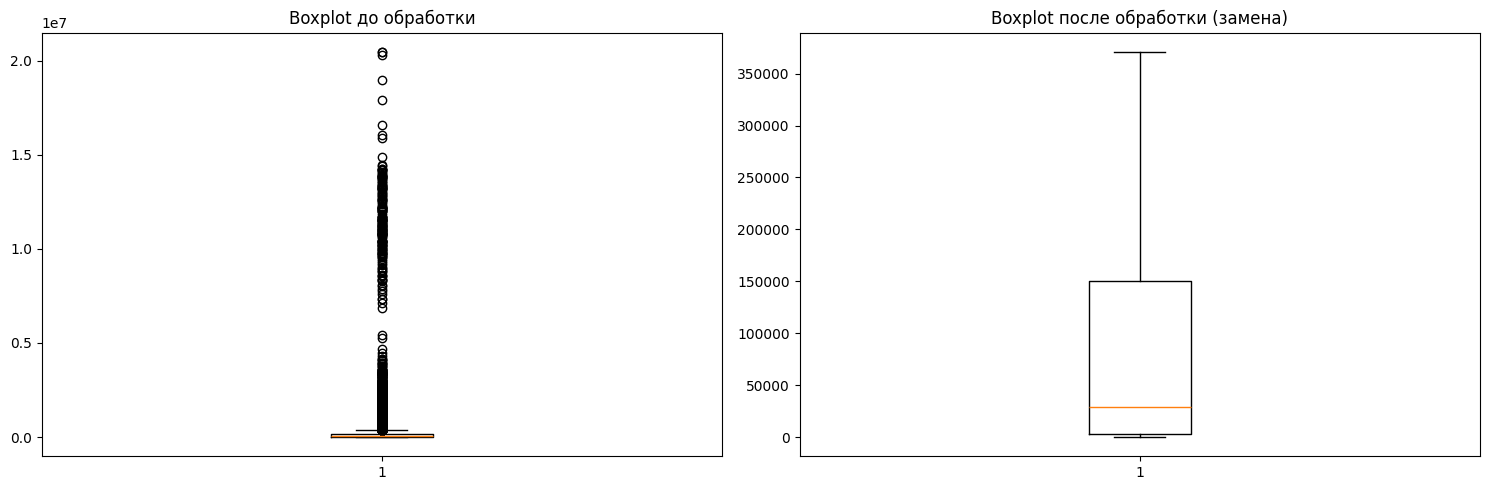



----- 4770 -----


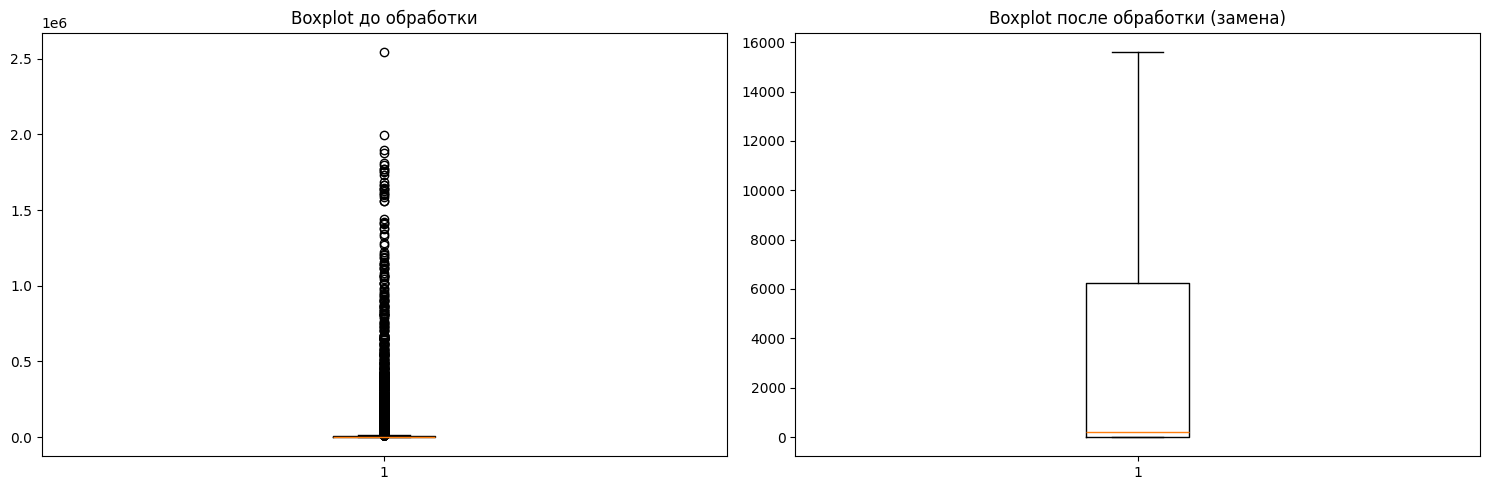



----- Total Bags -----


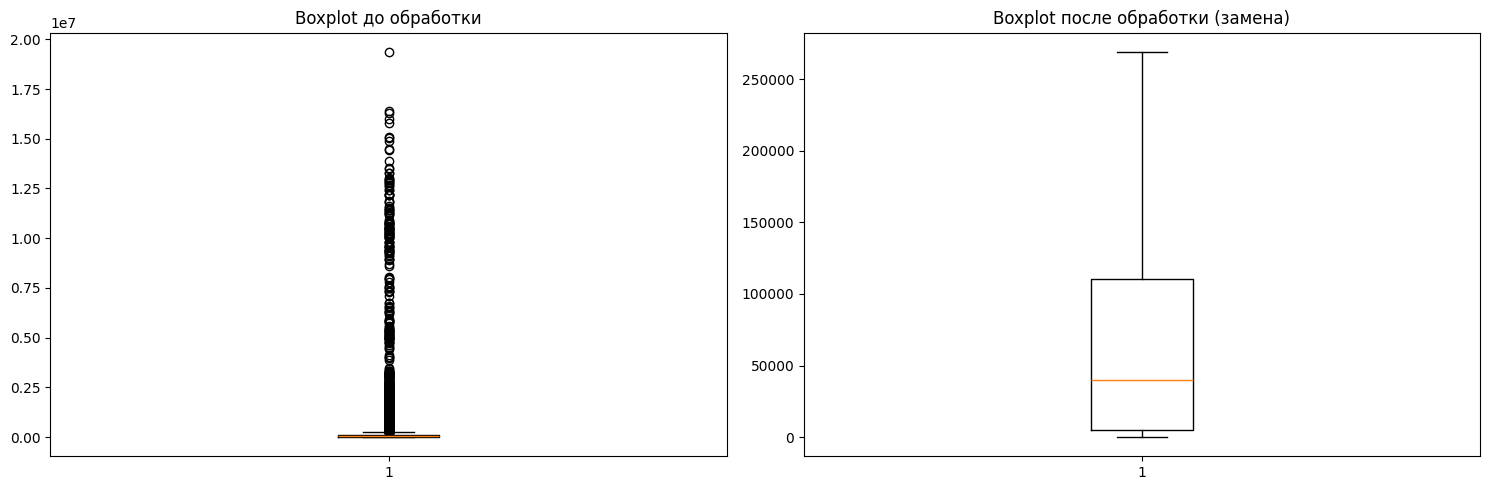



----- Small Bags -----


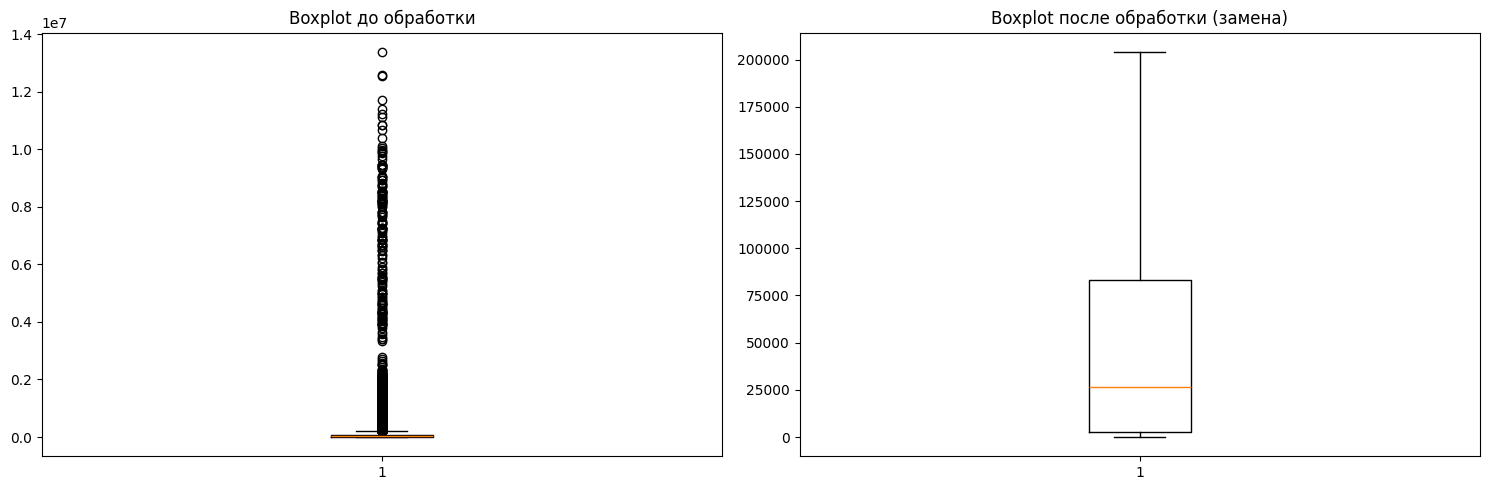



----- Large Bags -----


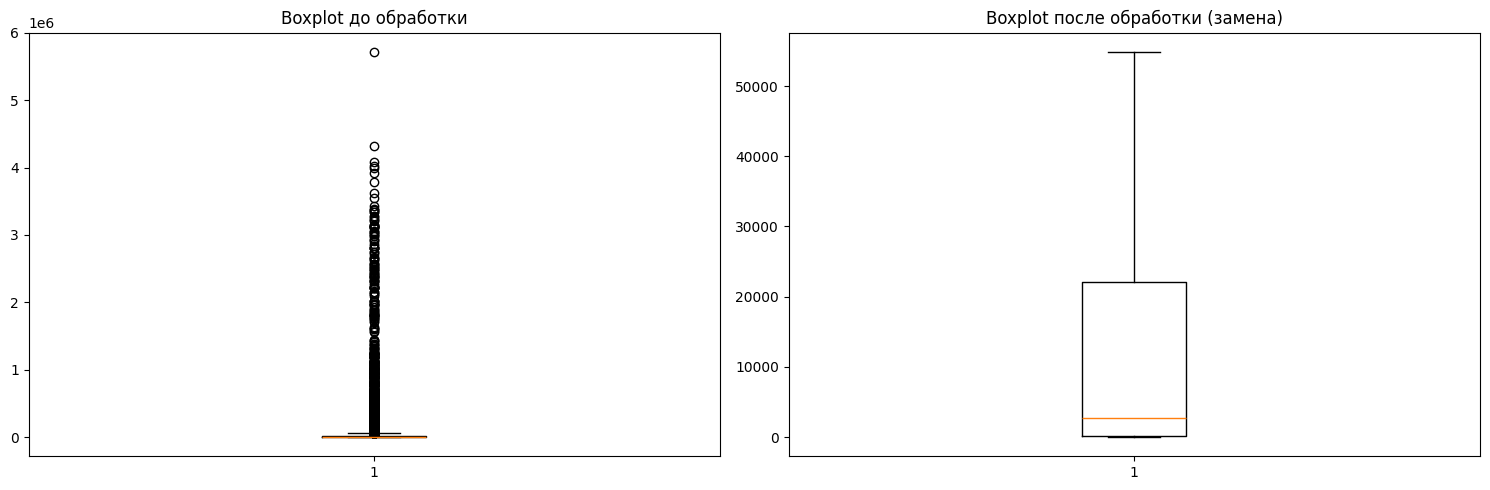



----- XLarge Bags -----


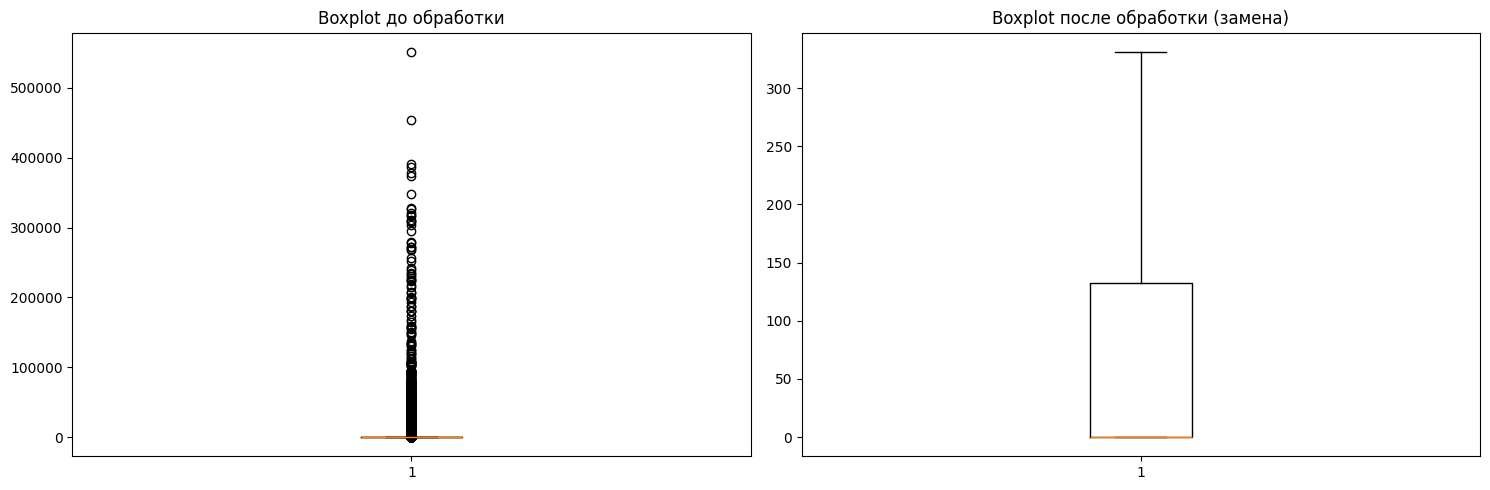

In [324]:
for feature in numerical_features:
    print(f"\n\n----- {feature} -----")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.boxplot(df_processed[feature])
    ax1.set_title('Boxplot до обработки')

    ax2.boxplot(df_clean[feature])
    ax2.set_title('Boxplot после обработки (замена)')

    

    plt.tight_layout()
    plt.show()

## Отбор 

In [325]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

посмотрим на результат с выбросами

In [333]:
# отделяем целевую
y = df_processed['AveragePrice']
X = df_processed.drop('AveragePrice', axis=1) 
X = X.drop('Z_Score', axis=1)  


# нормируем все что нормируется (в пределах разумного)
numerical_cols = X.select_dtypes(include=['float64']).columns
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# разделяем
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, shuffle=True
)

base_model = LinearRegression()
base_model.fit(X_train, y_train)

y_pred_base = base_model.predict(X_test)
mse_base = mean_squared_error(y_test, y_pred_base)
rmse_base = np.sqrt(mse_base)
r2_base = r2_score(y_test, y_pred_base)

print(f"\nПризнаков: {X_train.shape[1]}, MSE: {mse_base:.6f}, RMSE: {np.sqrt(mse_base):.6f}, R²: {r2_base:.6f} \n")



Признаков: 12, MSE: 0.091223, RMSE: 0.302032, R²: 0.432230 



а теперь без выбросов

In [334]:
# повторяем
y = df_clean['AveragePrice']
X = df_clean.drop('AveragePrice', axis=1)  

numerical_cols = X.select_dtypes(include=['float64']).columns
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, shuffle=True
)

X_train

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,organic,year,region,month
16391,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.00,True,2017,31,11
4990,0.54,0.56,0.41,1.00,0.92,0.71,1.00,0.00,False,2016,41,1
13653,0.01,0.01,0.01,0.00,0.01,0.01,0.00,0.00,True,2016,33,11
2074,0.14,0.28,0.10,0.01,0.11,0.13,0.05,0.00,False,2015,39,2
12377,0.04,0.00,0.10,0.00,0.01,0.01,0.00,0.00,True,2016,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.01,0.01,0.03,0.00,0.00,0.00,0.00,0.00,True,2015,41,6
11964,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True,2016,0,5
5390,0.08,0.00,0.15,0.05,0.10,0.13,0.00,0.00,False,2016,49,5
860,0.26,0.15,0.38,0.13,0.34,0.43,0.05,1.00,False,2015,16,6


### Моделька

In [335]:
# проверим на всех признаках
base_model = LinearRegression()
base_model.fit(X_train, y_train)

y_pred_base = base_model.predict(X_test)
mse_base = mean_squared_error(y_test, y_pred_base)
r2_base = r2_score(y_test, y_pred_base)

print(f"\nПризнаков: {X_train.shape[1]}, MSE: {mse_base:.6f}, RMSE: {np.sqrt(mse_base):.6f}, R²: {r2_base:.6f} \n")



Признаков: 12, MSE: 0.081580, RMSE: 0.285622, R²: 0.477481 



уже  лучше

ну в целом, ошибиться на 28 центов при разбросе цены в 2 доллара - норм

проверим, что получим жадником

### Жадный алгоритм

In [336]:
print("-"*100, "\n")


for n_features in range(1, X_train.shape[1]):
    sfs_temp = SequentialFeatureSelector(
        LinearRegression(),
        n_features_to_select=n_features,  
        direction='backward',
        scoring='neg_mean_squared_error',
        cv=5
    )
    
    sfs_temp.fit(X_train, y_train)
    selected_features = X_train.columns[sfs_temp.get_support()]
    print(selected_features)

    
    model = LinearRegression()
    model.fit(X_train[selected_features], y_train)

    y_pred = model.predict(X_test[selected_features])
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\nПризнаков: {n_features:2d}, MSE: {mse:.6f}, RMSE: {np.sqrt(mse):.6f}, R²: {r2:.6f} \n")
    print("-"*100, "\n")

---------------------------------------------------------------------------------------------------- 

Index(['organic'], dtype='object')

Признаков:  1, MSE: 0.098846, RMSE: 0.314397, R²: 0.366894 

---------------------------------------------------------------------------------------------------- 

Index(['Total Volume', 'organic'], dtype='object')

Признаков:  2, MSE: 0.096926, RMSE: 0.311329, R²: 0.379191 

---------------------------------------------------------------------------------------------------- 

Index(['Total Volume', '4225', 'organic'], dtype='object')

Признаков:  3, MSE: 0.092851, RMSE: 0.304715, R²: 0.405290 

---------------------------------------------------------------------------------------------------- 

Index(['Total Volume', '4225', 'organic', 'month'], dtype='object')

Признаков:  4, MSE: 0.088388, RMSE: 0.297302, R²: 0.433873 

---------------------------------------------------------------------------------------------------- 

Index(['Total Volume', '

In [337]:
print(f"\nПризнаков: {X_train.shape[1]}, MSE: {mse_base:.6f}, RMSE: {np.sqrt(mse_base):.6f}, R²: {r2_base:.6f} \n")



Признаков: 12, MSE: 0.081580, RMSE: 0.285622, R²: 0.477481 



Пупупу... Ну, жадник не помог. фич и так мало, и они в целом описывают таргет. так что берем все признаки.